# Importación de librerías

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Metadata

**client_id**: Every client’s unique ID.

**variation**: Indicates if a client was part of the experiment.

**visitor_id**: A unique ID for each client-device combination.

**visit_id**: A unique ID for each web visit/session.

**process_step**: Marks each step in the digital process.

**date_time**: Timestamp of each web activity.

**clnt_tenure_yr**: Represents how long the client has been with Vanguard, measured in years.

**clnt_tenure_mnth**: Further breaks down the client’s tenure with Vanguard in months.

**clnt_age**: Indicates the age of the client.

**gendr**: Specifies the client’s gender.

**num_accts**: Denotes the number of accounts the client holds with Vanguard.

**bal**: Gives the total balance spread across all accounts for a particular client.

**calls_6_mnth**: Records the number of times the client reached out over a call in the past six months.

**logons_6_mnth**: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.


# EDA & DC: Carga y análisis de los dataframes

In [268]:
# Cargar los archivos .txt
df_final_web_data_pt_1 = pd.read_csv("data/raw/df_final_web_data_pt_1.txt")
df_final_web_data_pt_2 = pd.read_csv("data/raw/df_final_web_data_pt_2.txt")

In [269]:
# Mostrar DataFrame 1
df_final_web_data_pt_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [270]:
# Mostrar DataFrame 2
df_final_web_data_pt_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [271]:
# Concatenación de DataFrames
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

In [272]:
# Mostrar resultado de la concatenación
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [273]:
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [274]:
# Exportar la concatenación de DataFrames a un csv
df_final_web_data.to_csv('df_final_web_data.csv', index=False)

In [275]:
# Cargar los archivos .txt en formato csv y los almacena como DataFrames de pandas
df_final_demo = pd.read_csv("data/raw/df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("data/raw/df_final_experiment_clients.txt")

In [276]:
# Mostrar DataFrame "df_final_demo"
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [277]:
# Mostrar DataFrame "df_final_experiment_clients"
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


## Borrado de filas vacías

In [278]:
# Contamos cuántas filas están completamente vacías en cada DataFrame
filas_vacias_demo = df_final_demo.isnull().all(axis=1).sum()
filas_vacias_experiment_clients = df_final_experiment_clients.isnull().all(axis=1).sum()
filas_vacias_web_data = df_final_web_data.isnull().all(axis=1).sum()

# Eliminamos las filas completamente vacías de cada DataFrame
df_final_demo_sin_vacias = df_final_demo.dropna(how='all')
df_final_experiment_clients_sin_vacias = df_final_experiment_clients.dropna(how='all')
df_final_web_data_sin_vacias = df_final_web_data.dropna(how='all')

# Mostramos cuántas filas vacías había en cada DataFrame
print("Filas vacías en df_final_demo:", filas_vacias_demo)
print("Filas vacías en df_final_experiment_clients:", filas_vacias_experiment_clients)
print("Filas vacías en df_final_web_data:", filas_vacias_web_data)

Filas vacías en df_final_demo: 0
Filas vacías en df_final_experiment_clients: 0
Filas vacías en df_final_web_data: 0


## Borrado de NaN

In [279]:
# Contar cuántos valores vacíos (NaN) hay en cada columna del DataFrame
valores_vacios = df_final_experiment_clients.isnull().sum()

# Mostrar los resultados
print("Valores vacíos en df_final_experiment_clients:")
print(valores_vacios)

Valores vacíos en df_final_experiment_clients:
client_id        0
Variation    20109
dtype: int64


In [280]:
# Eliminar filas que tienen cualquier valor vacío
df_final_experiment_clients = df_final_experiment_clients.dropna()

# Mostrar cuántas filas quedan después de eliminar las filas con valores vacíos
print("Filas restantes después de eliminar las filas vacías:")
print(len(df_final_experiment_clients))

Filas restantes después de eliminar las filas vacías:
50500


# EDA & DC: Merge de DataFrames

In [281]:
# Merge de "df_final_demo" y "df_final_experiment_clients" (Lo ideal hubiera sido hacer merge primero y limpiar después)
df_combined = pd.merge(df_final_experiment_clients, df_final_demo, on='client_id', how='inner')
df_combined

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [282]:
valores_nulos = df_combined.isnull().sum()
valores_nulos

client_id            0
Variation            0
clnt_tenure_yr      12
clnt_tenure_mnth    12
clnt_age            13
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
dtype: int64

In [283]:
filas_con_nulos = df_combined[df_combined.isnull().any(axis=1)]
filas_con_nulos

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
5171,8191345,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7131,5144725,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8902,7616759,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18742,2222915,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19391,5277910,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23678,8412164,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36137,8611797,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36245,355337,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38552,4666211,Control,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
38599,1227228,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# Eliminar filas que tienen valores nulos en al menos una columna
df_combined = df_combined.dropna()
df_combined

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [285]:
# Cambiar el nombre de la columna 'Variation' a 'variation'
df_combined = df_combined.rename(columns={'Variation': 'variation'})

# Mostrar las primeras filas del DataFrame
df_combined

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [286]:
df_combined['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
X        2
Name: count, dtype: int64

In [287]:
# Eliminar filas donde 'gendr' sea igual a 'X'
df_combined = df_combined[df_combined['gendr'] != 'X']

# Verificar que las filas han sido eliminadas
df_combined

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [288]:
df_combined['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
Name: count, dtype: int64

# Client behavior analysis

In [289]:
df_combined.clnt_age.describe()

count    50485.000000
mean        47.320362
std         15.518599
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

Métricas de edad y antigüedad:
         clnt_age  clnt_tenure_yr
mean    47.320362       12.031891
median  48.000000       11.000000
min     17.000000        2.000000
max     96.000000       55.000000


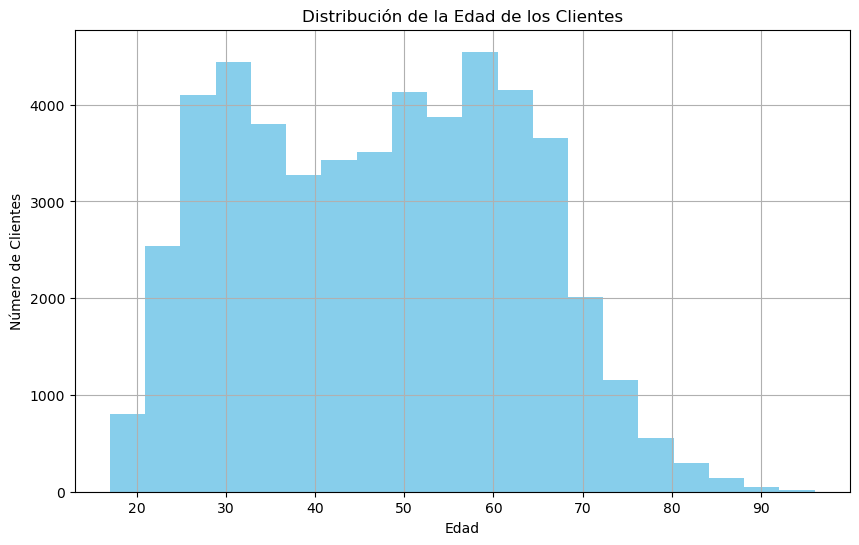

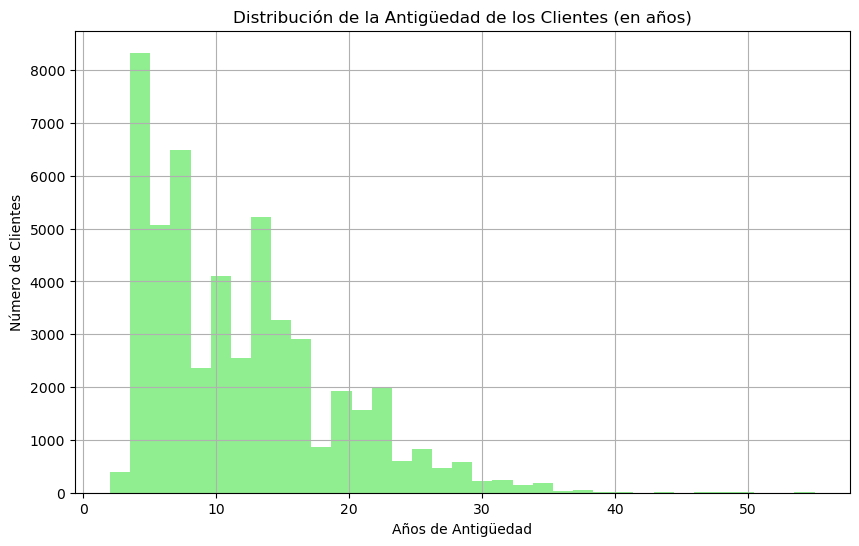

In [290]:
# Calcular métricas de tendencia central para edad y antigüedad
metrics = df_combined.agg({
    'clnt_age': ['mean', 'median', 'min', 'max'],
    'clnt_tenure_yr': ['mean', 'median', 'min', 'max']
})

# Mostrar las métricas
print("Métricas de edad y antigüedad:")
print(metrics)

# Graficar la distribución de la edad
plt.figure(figsize=(10, 6))
df_combined['clnt_age'].hist(bins=20, color='skyblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Número de Clientes')
plt.show()

# Graficar la distribución de la antigüedad del cliente
plt.figure(figsize=(10, 6))
df_combined['clnt_tenure_yr'].hist(bins=35, color='lightgreen')
plt.title('Distribución de la Antigüedad de los Clientes (en años)')
plt.xlabel('Años de Antigüedad')
plt.ylabel('Número de Clientes')
plt.show()




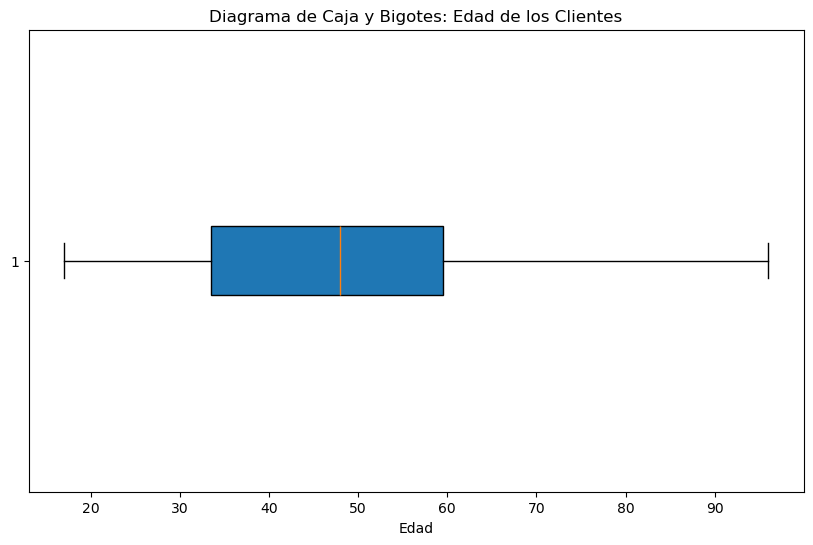

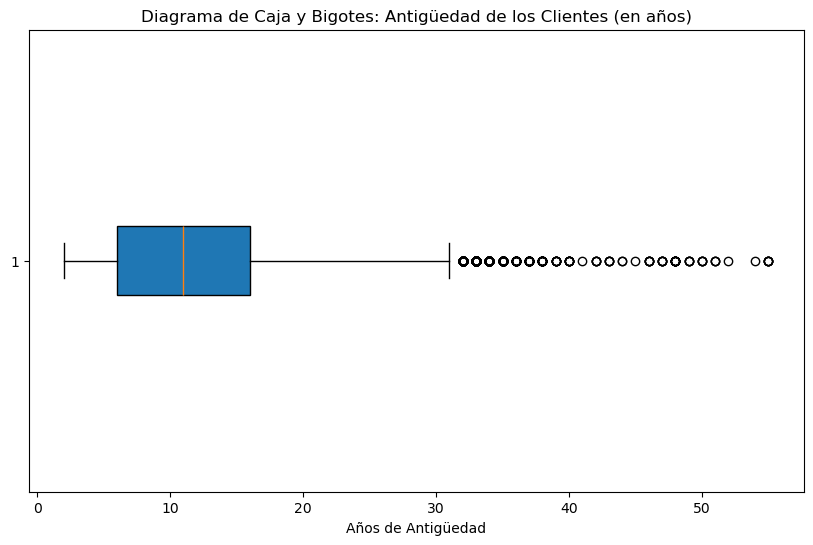

In [291]:
# Crear el boxplot para la distribución de la edad de los clientes
plt.figure(figsize=(10, 6))
plt.boxplot(df_combined['clnt_age'].dropna(), vert=False, patch_artist=True)
plt.title('Diagrama de Caja y Bigotes: Edad de los Clientes')
plt.xlabel('Edad')
plt.show()

# Crear el boxplot para la distribución de la antigüedad de los clientes (en años)
plt.figure(figsize=(10, 6))
plt.boxplot(df_combined['clnt_tenure_yr'].dropna(), vert=False, patch_artist=True)
plt.title('Diagrama de Caja y Bigotes: Antigüedad de los Clientes (en años)')
plt.xlabel('Años de Antigüedad')
plt.show()

In [292]:
# Obtener los cuartiles para la edad y la antigüedad
cuartiles_edad = df_combined['clnt_age'].quantile([0.25, 0.5, 0.75])
cuartiles_antiguedad = df_combined['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

# Definir el rango intercuartil (25% al 75%) para la edad y la antigüedad
rango_edad_bajo = cuartiles_edad[0.25]
rango_edad_alto = cuartiles_edad[0.75]

rango_antiguedad_bajo = cuartiles_antiguedad[0.25]
rango_antiguedad_alto = cuartiles_antiguedad[0.75]

# Calcular cuántos clientes están en el rango intercuartil de edad
clientes_en_rango_edad = df_combined[(df_combined['clnt_age'] >= rango_edad_bajo) & (df_combined['clnt_age'] <= rango_edad_alto)]
porcentaje_edad = (len(clientes_en_rango_edad) / len(df_combined)) * 100

# Calcular cuántos clientes están en el rango intercuartil de antigüedad
clientes_en_rango_antiguedad = df_combined[(df_combined['clnt_tenure_yr'] >= rango_antiguedad_bajo) & (df_combined['clnt_tenure_yr'] <= rango_antiguedad_alto)]
porcentaje_antiguedad = (len(clientes_en_rango_antiguedad) / len(df_combined)) * 100

# Resultados
print(f"La mayoría de nuestros clientes (aproximadamente {porcentaje_edad:.2f}%) se encuentran en el rango de edad {rango_edad_bajo:.0f}-{rango_edad_alto:.0f} años.")
print(f"La mayoría de nuestros clientes (aproximadamente {porcentaje_antiguedad:.2f}%) tienen una antigüedad de {rango_antiguedad_bajo:.0f}-{rango_antiguedad_alto:.0f} años.")


La mayoría de nuestros clientes (aproximadamente 50.58%) se encuentran en el rango de edad 34-60 años.
La mayoría de nuestros clientes (aproximadamente 61.43%) tienen una antigüedad de 6-16 años.


In [293]:
# Mostrar las columnas del DataFrame df_combined
df_combined


,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


# Performance Metrics

### KPI Completion Rate

In [294]:
df_final_web_data = df_final_web_data.drop_duplicates()
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [295]:
# Contar valores únicos de 'client_id'
unique_client_ids = df_final_web_data['client_id'].nunique()

# Contar valores únicos de 'visitor_id'
unique_visitor_ids = df_final_web_data['visitor_id'].nunique()

# Contar valores únicos de 'visit_id'
unique_visit_ids = df_final_web_data['visit_id'].nunique()

# Resultados
print(f"Valores únicos de client_id: {unique_client_ids}")
print(f"Valores únicos de visitor_id: {unique_visitor_ids}")
print(f"Valores únicos de visit_id: {unique_visit_ids}")

Valores únicos de client_id: 120157
Valores únicos de visitor_id: 130236
Valores únicos de visit_id: 158095


In [296]:
# Filtrar df_final_web_data para quedarse solo con los client_id presentes en df_combined
df_filtered_web_data = df_final_web_data[df_final_web_data['client_id'].isin(df_combined['client_id'])]

# Verificar las primeras filas del DataFrame filtrado
df_filtered_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


In [297]:
# Contar valores únicos de 'client_id'
unique_client_ids = df_filtered_web_data['client_id'].nunique()

# Contar valores únicos de 'visitor_id'
unique_visitor_ids = df_filtered_web_data['visitor_id'].nunique()

# Contar valores únicos de 'visit_id'
unique_visit_ids = df_filtered_web_data['visit_id'].nunique()

# Resultados
print(f"Valores únicos de client_id: {unique_client_ids}")
print(f"Valores únicos de visitor_id: {unique_visitor_ids}")
print(f"Valores únicos de visit_id: {unique_visit_ids}")

Valores únicos de client_id: 50485
Valores únicos de visitor_id: 55992
Valores únicos de visit_id: 69181


In [298]:
"""Opción 1: Usar client_id (por cliente único)
Argumento a favor:
Enfoque centrado en el cliente: Si te interesa saber cuántos clientes únicos completan el proceso, sin importar cuántas veces visitan la página, entonces client_id es la métrica adecuada.
Esto es relevante si lo que importa es si el diseño o la interfaz está ayudando a los clientes únicos a llegar al paso de confirmación, independientemente de cuántas veces lo intenten.
Ejemplo:
Si el cliente A inicia tres sesiones y completa el proceso en la tercera, con client_id contarías este cliente una sola vez. El Completion Rate aquí mide cuántos clientes alcanzan el paso de confirmación.
Opción 2: Usar visit_id (por sesión/visita)
Argumento a favor:
Enfoque centrado en la interacción/sesión: Si te interesa saber el rendimiento por cada visita, es decir, si cada sesión de navegación individualmente lleva a una confirmación, entonces visit_id es la mejor opción.
Esto es relevante si el objetivo es evaluar cómo cada interacción con el sitio o proceso (sesión) lleva al éxito. Esto puede ser importante si quieres medir la efectividad del diseño para cada oportunidad (sesión) que tiene el cliente de completar el proceso.
Ejemplo:
Si el cliente A inicia tres sesiones y solo completa el proceso en una de ellas, contarías una sesión exitosa de tres. El Completion Rate aquí mide cuántas visitas alcanzan la confirmación.
Recomendación:
Usar visit_id (por sesión/visita) es la mejor opción en este caso.
Argumento principal: El proceso que estás analizando es un flujo web, y es común que los usuarios interactúen con la plataforma en múltiples ocasiones (sesiones). El Completion Rate por sesión te dará una medida más precisa de cuántas de esas interacciones realmente terminan en una conversión exitosa.

Ventajas de usar visit_id:
Cada interacción cuenta: Si un cliente necesita varias visitas para completar el proceso, podrías descubrir cuántas sesiones son necesarias en promedio para llegar al final.
Rendimiento del diseño: Si quieres medir la efectividad del diseño o la interfaz en cada visita, el visit_id es el mejor indicador de éxito o fracaso en cada interacción.
Conclusión:
El Completion Rate basado en visit_id te dará una métrica más sensible para entender el rendimiento del proceso en cada visita/sesión, lo que es crucial en un contexto web. Calculando el éxito de cada sesión, puedes identificar cuántas veces un usuario necesita interactuar con la plataforma antes de lograr el éxito, lo cual es valioso para evaluar la efectividad del diseño.

"""

'Opción 1: Usar client_id (por cliente único)\nArgumento a favor:\nEnfoque centrado en el cliente: Si te interesa saber cuántos clientes únicos completan el proceso, sin importar cuántas veces visitan la página, entonces client_id es la métrica adecuada.\nEsto es relevante si lo que importa es si el diseño o la interfaz está ayudando a los clientes únicos a llegar al paso de confirmación, independientemente de cuántas veces lo intenten.\nEjemplo:\nSi el cliente A inicia tres sesiones y completa el proceso en la tercera, con client_id contarías este cliente una sola vez. El Completion Rate aquí mide cuántos clientes alcanzan el paso de confirmación.\nOpción 2: Usar visit_id (por sesión/visita)\nArgumento a favor:\nEnfoque centrado en la interacción/sesión: Si te interesa saber el rendimiento por cada visita, es decir, si cada sesión de navegación individualmente lleva a una confirmación, entonces visit_id es la mejor opción.\nEsto es relevante si el objetivo es evaluar cómo cada interac

In [299]:
# Unir df_filtered_web_data con df_combined usando client_id para obtener el grupo Test o Control
df_filtered_merged = pd.merge(df_filtered_web_data, df_combined[['client_id', 'variation']], on='client_id', how='left')
df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317110,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317111,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317112,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317113,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [300]:
# Paso 1: Filtrar las visitas que han alcanzado el paso 'confirm'
df_confirm_visits = df_filtered_merged[df_filtered_merged['process_step'] == 'confirm']

# Paso 2: Eliminar duplicados basados en 'visit_id' para asegurarnos de que solo contamos una vez por 'visit_id'
df_unique_confirm_visits = df_confirm_visits.drop_duplicates(subset=['visit_id'])

# Paso 3: Calcular el número total de visitas (únicos visit_id) en el grupo Test
total_test_visits = df_filtered_merged[df_filtered_merged['variation'] == 'Test']['visit_id'].nunique()

# Paso 4: Calcular el número de visitas que llegaron a 'confirm' en el grupo Test
test_confirm_visits = df_unique_confirm_visits[df_unique_confirm_visits['variation'] == 'Test']['visit_id'].nunique()

# Paso 5: Calcular el Completion Rate para el grupo Test
completion_rate_test = (test_confirm_visits / total_test_visits) * 100

# Calcular el Completion Rate para el grupo Control
total_control_visits = df_filtered_merged[df_filtered_merged['variation'] == 'Control']['visit_id'].nunique()
control_confirm_visits = df_unique_confirm_visits[df_unique_confirm_visits['variation'] == 'Control']['visit_id'].nunique()
completion_rate_control = (control_confirm_visits / total_control_visits) * 100

# Mostrar el resultado
print("Completion Rate para el grupo Test (basado en visit_id únicos): {:.2f}%".format(completion_rate_test))
print("Completion Rate para el grupo Control (basado en visit_id únicos): {:.2f}%".format(completion_rate_control))


Completion Rate para el grupo Test (basado en visit_id únicos): 58.39%
Completion Rate para el grupo Control (basado en visit_id únicos): 49.70%


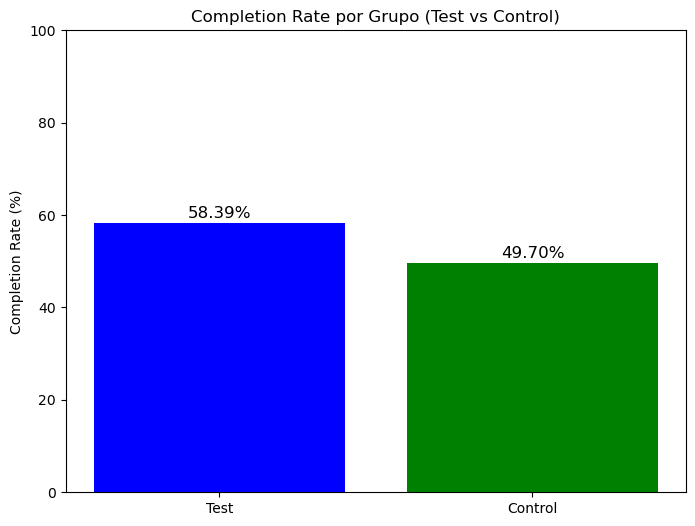

In [301]:
# Crear los datos para el gráfico
labels = ['Test', 'Control']
completion_rates = [completion_rate_test, completion_rate_control]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, completion_rates, color=['blue', 'green'])

# Añadir título y etiquetas
plt.title('Completion Rate por Grupo (Test vs Control)')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)  # Establecer límites de 0 a 100% para el eje Y

# Mostrar el porcentaje encima de cada barra
for i, rate in enumerate(completion_rates):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()


#

### KPI Time Spent on Each Step

In [302]:
df_filtered_merged.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
variation       object
dtype: object

In [303]:
# Asegurarse de que la columna 'date_time' esté en formato datetime
df_filtered_merged['date_time'] = pd.to_datetime(df_filtered_merged['date_time'])

# Ordenar el DataFrame por la columna 'date_time' en orden cronológico
df_filtered_merged_sorted = df_filtered_merged.sort_values(by='date_time', ascending=True)

# Mostrar las primeras filas del DataFrame ordenado
df_filtered_merged_sorted.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation
34549,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control
34547,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control
34546,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control
34545,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control


In [304]:
df_filtered_merged.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
variation               object
dtype: object

In [305]:
# Ordenar el DataFrame por la columna 'date_time' en orden cronológico
df_filtered_merged = df_filtered_merged.sort_values(by='date_time', ascending=True)

# Calcular el tiempo transcurrido entre cada 'process_step' para cada 'visit_id' utilizando shift(1)
df_filtered_merged['time_diff'] = df_filtered_merged.groupby('visit_id')['date_time'].shift(1)

df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff
34549,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control,NaT
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control,2017-03-15 00:19:28
34547,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control,2017-03-15 00:20:50
34546,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control,2017-03-15 00:22:52
34545,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control,2017-03-15 00:23:47
...,...,...,...,...,...,...,...
286933,291330,992344309_24884468623,91879336_25502670457_529422,step_1,2017-06-20 23:21:41,Control,2017-06-20 23:21:34
314796,1558312,397562195_28573798537,175513303_32086468382_224926,confirm,2017-06-20 23:26:00,Control,2017-06-20 23:19:26
286536,6187864,113539532_90731779729,77393632_6804608909_354572,start,2017-06-20 23:56:17,Control,NaT
286535,6187864,113539532_90731779729,77393632_6804608909_354572,step_1,2017-06-20 23:56:30,Control,2017-06-20 23:56:17


In [306]:
# Calcular la diferencia entre 'date_time' actual y 'date_time' anterior para cada cliente
df_filtered_merged['time_diff'] = df_filtered_merged['date_time'] - df_filtered_merged['time_diff']

# Mostrar las primeras filas para verificar
df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff
34549,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control,NaT
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control,0 days 00:01:22
34547,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control,0 days 00:02:02
34546,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control,0 days 00:00:55
34545,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control,0 days 00:02:37
...,...,...,...,...,...,...,...
286933,291330,992344309_24884468623,91879336_25502670457_529422,step_1,2017-06-20 23:21:41,Control,0 days 00:00:07
314796,1558312,397562195_28573798537,175513303_32086468382_224926,confirm,2017-06-20 23:26:00,Control,0 days 00:06:34
286536,6187864,113539532_90731779729,77393632_6804608909_354572,start,2017-06-20 23:56:17,Control,NaT
286535,6187864,113539532_90731779729,77393632_6804608909_354572,step_1,2017-06-20 23:56:30,Control,0 days 00:00:13


In [307]:
df_filtered_merged.dtypes

client_id                 int64
visitor_id               object
visit_id                 object
process_step             object
date_time        datetime64[ns]
variation                object
time_diff       timedelta64[ns]
dtype: object

In [308]:
df_filtered_merged['time_diff_sec'] = df_filtered_merged['time_diff'].dt.total_seconds()
df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff,time_diff_sec
34549,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control,NaT,NaN
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control,0 days 00:01:22,82.0
34547,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control,0 days 00:02:02,122.0
34546,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control,0 days 00:00:55,55.0
34545,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control,0 days 00:02:37,157.0
...,...,...,...,...,...,...,...,...
286933,291330,992344309_24884468623,91879336_25502670457_529422,step_1,2017-06-20 23:21:41,Control,0 days 00:00:07,7.0
314796,1558312,397562195_28573798537,175513303_32086468382_224926,confirm,2017-06-20 23:26:00,Control,0 days 00:06:34,394.0
286536,6187864,113539532_90731779729,77393632_6804608909_354572,start,2017-06-20 23:56:17,Control,NaT,NaN
286535,6187864,113539532_90731779729,77393632_6804608909_354572,step_1,2017-06-20 23:56:30,Control,0 days 00:00:13,13.0


In [312]:
grouped_df = df_filtered_merged.groupby(['variation', 'process_step']).agg({'time_diff_sec': 'mean'})
grouped_df


time_diff_sec
variation process_step               
Control   confirm          129.724677
          start            177.302112
          step_1            43.164558
          step_2            38.855010
          step_3            94.359914
Test      confirm          129.597263
          start            152.917167
          step_1            37.817845
          step_2            48.193508
          step_3            97.404834

In [310]:
df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff,time_diff_sec,is_error
34549,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control,NaT,NaN,False
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control,0 days 00:01:22,82.0,False
34547,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control,0 days 00:02:02,122.0,False
34546,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control,0 days 00:00:55,55.0,False
34545,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control,0 days 00:02:37,157.0,False
...,...,...,...,...,...,...,...,...,...
286933,291330,992344309_24884468623,91879336_25502670457_529422,step_1,2017-06-20 23:21:41,Control,0 days 00:00:07,7.0,False
314796,1558312,397562195_28573798537,175513303_32086468382_224926,confirm,2017-06-20 23:26:00,Control,0 days 00:06:34,394.0,False
286536,6187864,113539532_90731779729,77393632_6804608909_354572,start,2017-06-20 23:56:17,Control,NaT,NaN,False
286535,6187864,113539532_90731779729,77393632_6804608909_354572,step_1,2017-06-20 23:56:30,Control,0 days 00:00:13,13.0,False


In [309]:
df_filtered_merged['is_error'] = False

In [311]:
error_rate = len(df_filtered_merged[df_filtered_merged['is_error'] == True])/len(df_filtered_merged)*100
error_rate

0.0

In [313]:
# Paso 1: Asegurarse de que la columna 'date_time' esté ordenada cronológicamente
df_filtered_merged = df_filtered_merged.sort_values(by='date_time', ascending=True)

In [314]:
df_filtered_merged.head(60)
df_filtered_merged.dtypes

client_id                  int64
visitor_id                object
visit_id                  object
process_step              object
date_time         datetime64[ns]
variation                 object
time_diff        timedelta64[ns]
time_diff_sec            float64
is_error                    bool
dtype: object

In [315]:
# Paso 2: Crear una columna 'previous_step' que contenga el paso anterior para cada client_id
df_filtered_merged['previous_step'] = df_filtered_merged.groupby('client_id')['process_step'].shift(1)
df_filtered_merged.head(50)

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff,time_diff_sec,is_error,previous_step
34549,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28,Control,NaT,NaN,False,NaN
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control,0 days 00:01:22,82.0,False,start
34547,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control,0 days 00:02:02,122.0,False,step_1
34546,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control,0 days 00:00:55,55.0,False,step_2
34545,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control,0 days 00:02:37,157.0,False,step_3
77826,4192640,692067844_75217592829,706721307_85347845958_18583,start,2017-03-15 00:43:23,Test,NaT,NaN,False,NaN
77825,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:43:32,Test,0 days 00:00:09,9.0,False,start
77824,4192640,692067844_75217592829,706721307_85347845958_18583,step_2,2017-03-15 00:43:48,Test,0 days 00:00:16,16.0,False,step_1
77823,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:44:36,Test,0 days 00:00:48,48.0,False,step_2
77822,4192640,692067844_75217592829,706721307_85347845958_18583,start,2017-03-15 00:44:38,Test,0 days 00:00:02,2.0,False,step_1


In [316]:
# Paso 3: Definir el orden correcto de los pasos
correct_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Paso 4: Filtrar solo los registros donde el orden de los pasos es correcto
df_filtered_merged_valid = df_filtered_merged[df_filtered_merged.apply(
    lambda row: row['previous_step'] in correct_steps[:correct_steps.index(row['process_step'])], axis=1
)]

df_filtered_merged_valid.head(20)



,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff,time_diff_sec,is_error,previous_step
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control,0 days 00:01:22,82.0,False,start
34547,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52,Control,0 days 00:02:02,122.0,False,step_1
34546,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47,Control,0 days 00:00:55,55.0,False,step_2
34545,7179755,167765295_97487764427,264484508_5982901710_928530,confirm,2017-03-15 00:26:24,Control,0 days 00:02:37,157.0,False,step_3
77825,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:43:32,Test,0 days 00:00:09,9.0,False,start
77824,4192640,692067844_75217592829,706721307_85347845958_18583,step_2,2017-03-15 00:43:48,Test,0 days 00:00:16,16.0,False,step_1
102674,6752370,258848572_66112715827,147442660_10728929690_338280,step_1,2017-03-15 05:37:45,Test,0 days 00:00:10,10.0,False,start
102672,6752370,258848572_66112715827,147442660_10728929690_338280,step_2,2017-03-15 05:40:01,Test,0 days 00:00:08,8.0,False,step_1
204657,9584408,748244138_48778380454,484298588_81471639218_981974,step_1,2017-03-15 06:03:44,Control,0 days 00:00:20,20.0,False,start
204656,9584408,748244138_48778380454,484298588_81471639218_981974,step_2,2017-03-15 06:03:53,Control,0 days 00:00:09,9.0,False,step_1


In [317]:
df_2 = df_filtered_merged_valid[df_filtered_merged_valid['process_step'] == 'step_1']
df_2

,client_id,visitor_id,visit_id,process_step,date_time,variation,time_diff,time_diff_sec,is_error,previous_step
34548,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50,Control,0 days 00:01:22,82.0,False,start
77825,4192640,692067844_75217592829,706721307_85347845958_18583,step_1,2017-03-15 00:43:32,Test,0 days 00:00:09,9.0,False,start
102674,6752370,258848572_66112715827,147442660_10728929690_338280,step_1,2017-03-15 05:37:45,Test,0 days 00:00:10,10.0,False,start
204657,9584408,748244138_48778380454,484298588_81471639218_981974,step_1,2017-03-15 06:03:44,Control,0 days 00:00:20,20.0,False,start
204653,9584408,748244138_48778380454,484298588_81471639218_981974,step_1,2017-03-15 06:14:36,Control,0 days 00:00:08,8.0,False,start
...,...,...,...,...,...,...,...,...,...,...
243285,1545935,976873968_42239039722,10056419_61656665964_803695,step_1,2017-06-20 23:13:57,Test,0 days 00:00:11,11.0,False,start
314801,1558312,397562195_28573798537,175513303_32086468382_224926,step_1,2017-06-20 23:17:12,Control,0 days 00:00:26,26.0,False,start
243283,1545935,976873968_42239039722,10056419_61656665964_803695,step_1,2017-06-20 23:17:45,Test,0 days 00:00:03,3.0,False,start
286933,291330,992344309_24884468623,91879336_25502670457_529422,step_1,2017-06-20 23:21:41,Control,0 days 00:00:07,7.0,False,start


In [318]:






# Paso 5: Calcular el tiempo transcurrido entre cada 'process_step' para cada 'client_id'
df_filtered_merged_valid['time_diff'] = df_filtered_merged_valid['date_time'] - df_filtered_merged_valid.groupby('client_id')['date_time'].shift(1)

# Paso 6: Convertir 'time_diff' a minutos (total_seconds() / 60)
df_filtered_merged_valid['time_diff_minutes'] = df_filtered_merged_valid['time_diff'].dt.total_seconds() / 60

# Paso 7: Calcular la media de tiempo en minutos por grupo (Test y Control) y por paso (process_step)
average_times_by_group_and_step = df_filtered_merged_valid.groupby(['variation', 'process_step'])['time_diff_minutes'].mean().reset_index()

# Paso 8: Convertir la media de minutos a formato minutos:segundos
average_times_by_group_and_step['average_time_diff'] = average_times_by_group_and_step['time_diff_minutes'].apply(
    lambda x: '{:02.0f}:{:02.0f}'.format(*divmod(x * 60, 60))
)

# Paso 9: Eliminar la columna intermedia 'time_diff_minutes' si no es necesaria
average_times_by_group_and_step.drop(columns=['time_diff_minutes'], inplace=True)

# Mostrar el resultado
average_times_by_group_and_step

/var/folders/lb/xlcp_nw57bz0k682c287nrk00000gn/T/ipykernel_11033/4172926025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_merged_valid['time_diff'] = df_filtered_merged_valid['date_time'] - df_filtered_merged_valid.groupby('client_id')['date_time'].shift(1)
/var/folders/lb/xlcp_nw57bz0k682c287nrk00000gn/T/ipykernel_11033/4172926025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_merged_valid['time_diff_minutes'] = df_filtered_merged_valid['time_diff'].dt.total_seconds() / 6

,variation,process_step,average_time_diff
0,Control,confirm,510:44
1,Control,step_1,12529:32
2,Control,step_2,19:37
3,Control,step_3,44:41
4,Test,confirm,197:36
5,Test,step_1,8782:58
6,Test,step_2,13:15
7,Test,step_3,13:23
